** FOURTH MODEL ** 

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

See if we have GPU 

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18144436629342183992
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2247832372
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7751294176301474625
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


Name of model file to export

In [3]:
MODEL_FILENAME = "exported_models/model4.hdf5"

Creation of network

In [4]:
classifier = Sequential()

In [5]:
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

In [6]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
classifier.add(Flatten())

In [11]:
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

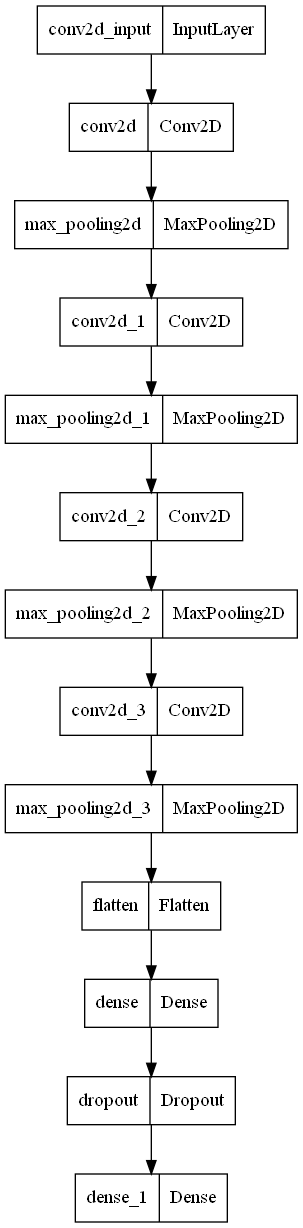

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='imgs/structure/model4_plot.png', show_shapes=False, show_layer_names=True)

Data augmentation

Load train and test data

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset3/train', target_size = (128, 128), batch_size = 32, class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset3/test', target_size = (128, 128), batch_size = 32, class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:


history = classifier.fit(training_set,
    steps_per_epoch = 20000/32,
    epochs = 25,
    validation_data = test_set,
    validation_steps = 2000/32,
    workers=12,
    max_queue_size=100)



Epoch 1/25
625/625 [==============================] - 44s 60ms/step - loss: 0.6603 - accuracy: 0.5929 - val_loss: 0.5771 - val_accuracy: 0.6999
Epoch 2/25
625/625 [==============================] - 31s 49ms/step - loss: 0.5623 - accuracy: 0.7128 - val_loss: 0.5392 - val_accuracy: 0.7475
Epoch 3/25
625/625 [==============================] - 30s 47ms/step - loss: 0.4876 - accuracy: 0.7696 - val_loss: 0.4120 - val_accuracy: 0.8056
Epoch 4/25
625/625 [==============================] - 33s 52ms/step - loss: 0.4336 - accuracy: 0.8020 - val_loss: 0.3687 - val_accuracy: 0.8239
Epoch 5/25
625/625 [==============================] - 32s 50ms/step - loss: 0.3948 - accuracy: 0.8276 - val_loss: 0.3762 - val_accuracy: 0.8343
Epoch 6/25
625/625 [==============================] - 32s 50ms/step - loss: 0.3726 - accuracy: 0.8385 - val_loss: 0.3199 - val_accuracy: 0.8596
Epoch 7/25
625/625 [==============================] - 39s 61ms/step - loss: 0.3459 - accuracy: 0.8505 - val_loss: 0.2981 - val_accuracy:

In [17]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on train data")
results = classifier.evaluate(training_set, batch_size=32)
print("train loss, test acc:", results)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = classifier.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)


Evaluate on train data
625/625 [==============================] - 80s 128ms/step - loss: 0.1716 - accuracy: 0.9301
train loss, test acc: [0.17158164083957672, 0.9300500154495239]
Evaluate on test data
157/157 [==============================] - 7s 42ms/step - loss: 0.2387 - accuracy: 0.9068
test loss, test acc: [0.2386574000120163, 0.9067999720573425]


In [18]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


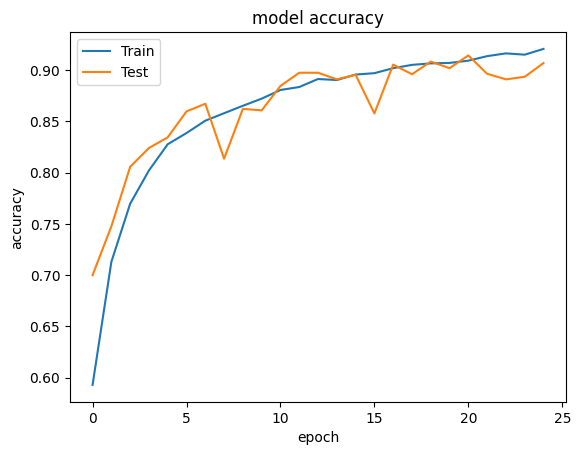

In [19]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('imgs/validation/model4_accuracy.png')
plt.show()

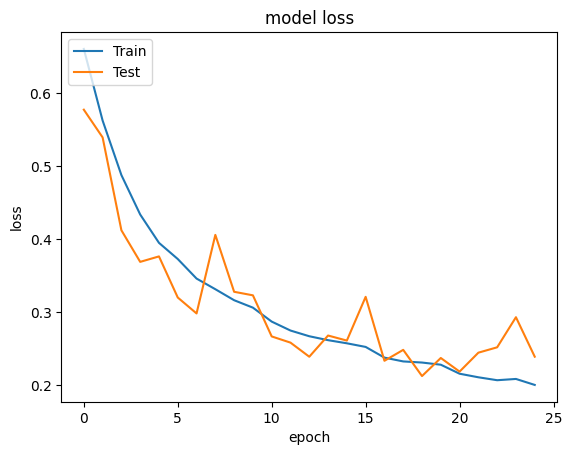

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('imgs/validation/model4_loss.png')
plt.show()

In [21]:
classifier.save(MODEL_FILENAME)

['./test/1.jpg', './test/2.jpg', './test/3.jpg', './test/4.jpg', './test/5.jpg', './test/6.jpg', './test/7.jpg', './test/a.jpg', './test/b.jpg', './test/c.jpg', './test/d.jpg', './test/e.jpg']


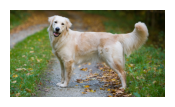

Prediction: is a cat
-----------------


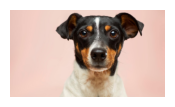

Prediction: is a dog
-----------------


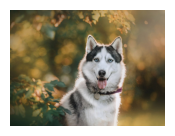

Prediction: is a cat
-----------------


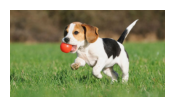

Prediction: is a cat
-----------------


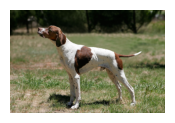

Prediction: is a cat
-----------------


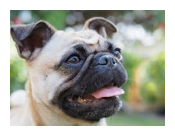

Prediction: is a cat
-----------------


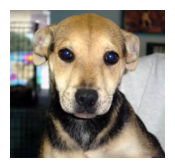

Prediction: is a cat
-----------------


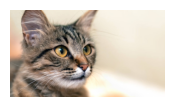

Prediction: is a dog
-----------------


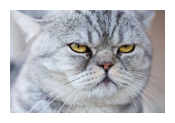

Prediction: is a dog
-----------------


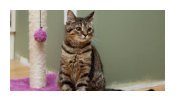

Prediction: is a cat
-----------------


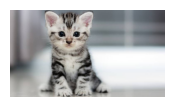

Prediction: is a dog
-----------------


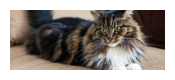

Prediction: is a cat
-----------------


In [23]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np # The local path to our target image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils import paths

imgs_path = './test/' 

image_files = list(paths.list_images(imgs_path))
print(image_files)


for image_file in image_files:

    # Show the annotated image
    img = mpimg.imread(image_file)
    plt.subplots(figsize=(2, 2))
    imgplot = plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()

    img = load_img(image_file, target_size=(128,128))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # Finally we preprocess the batch
    # (this does channel-wise color normalization)
    x = preprocess_input(x)
    preds = classifier.predict(x, verbose=0)
    if preds[0][0] == 1:
        print("Prediction: is a dog")
        print("-----------------")
    else:
        print("Prediction: is a cat")
        print("-----------------")